In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

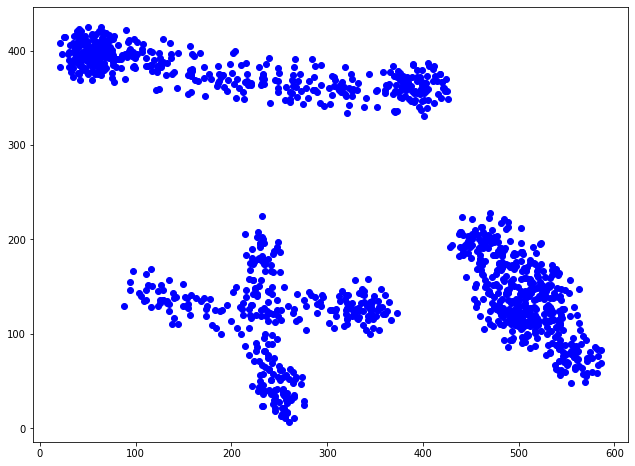

In [19]:
 import pygame

points = np.empty((0,2), dtype='f')

c_radius = 2
c_color = (0,0,255)
c_thickness = 0 

bg_color = (255,255,255)
(width,height) = (640,480)
screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("#3")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing:
        (x, y) = pygame.mouse.get_pos()
        r = np.random.uniform(0, 30)
        t = np.random.uniform(0, 2*np.pi)
        coord = [x+r*np.cos(t), y+r*np.sin(t)]
        global points
        points = np.append(points, [coord], axis=0)
            
    screen.fill(bg_color)
    for point in points:
        pygame.draw.circle(screen,c_color,(int(point[0]),int(point[1])),c_radius,c_thickness)
    pygame.display.flip()
    
pygame.quit()

fig = plt.figure(figsize=(width/60,height/60))
plt.scatter(points[:,0],height-points[:,1],c="blue")
plt.show()

[]
[[507.15958 351.50385]
 [195.77975 122.98853]
 [ 59.21138  83.38424]]
2.0
[2 2 2 ... 0 0 0]
[[447.40936 356.57037]
 [261.04468 202.90048]
 [ 64.38835  83.42928]]
0


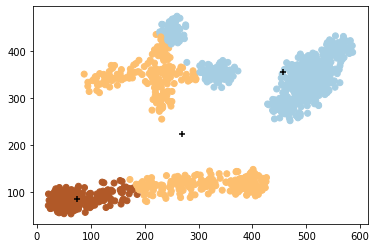

In [30]:
class K_Means():
    
        
    def __init__(self, dataset, n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.full_centroids_random_number()
        # нуждать сделать его случайным 
        self.labels = np.array([], dtype='i')
        self.fitted = False
        self.max_n_iter = 100
        self.tolerance = self.full_tolerance()
        
    def full_centroids_random_number(self):
        n=self.dataset.shape[0]
        self.centroids = np.array([self.dataset[int(np.random.rand()*n)] for k in range(self.n_clusters)], dtype='f')
    def full_tolerance(self):
        k=math.fabs(min(self.dataset[:,0])-max(self.dataset[:,0]))
        for i in range (0,1):       
            if (math.fabs(min(self.dataset[:,i])-max(self.dataset[:,i])<k)):
                k=math.fabs(min(self.dataset[:,i])-max(self.dataset[:,i]))
            if (math.fabs(min(self.dataset[i,:])-max(self.dataset[i,:])<k)):
                k=math.fabs(min(self.dataset[i,:])-max(self.dataset[i,:]))
        return k
        
    def get_dist(self, list1, list2):
        return np.sqrt(sum((i-j)**2 for i,j in zip(list1,list2))) #zip-1элемент в массиве list1 соединяеться с 1 элементом list2
                       
    def get_squre_dist(self,list1,list2):
        return sum((i-j)**2 for i,j in zip(list1,list2))
                   
    def get_1(self,list1,list2):
        return sum(math.fabs(i-j) for i,j in zip(list1,list2))
    
    def get_2(self,list1,list2):
        return max(math.fabs(i-j) for i,j in zip(list1,list2))
                       
                       
    def distribute_data(self):#определяем принадлежность каждой точки к определеному кластеру
        self.labels = np.array([], dtype='i')
        for data in self.dataset:
            #print(np.array([self.get_dist(data,center) for center in self.centroids]).argmin())
            self.labels = np.append(self.labels,\
                                   np.array([self.get_dist(data,center) \
                                             for center in self.centroids]).argmin())
            
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape )
            for k,label in enumerate(self.labels):
                if label == i:
                    temp += self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
            
    def fit(self):
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                print(iter)
                break
            iter += 1
        self.fitted = True
        
    def predict(self, list2d):
        if not self.fitted:
            seld.fit()
        labels = np.array([],dtype="i")
        for data in list2d:
            labels= np.append(labels,np.array([self.get_dist(data,center)\
                                              for center in self.centroids]).argmin())
        return labels
        
kmeans = K_Means(points, n_clusters=3)
print(kmeans.labels)
print(kmeans.centroids)

print(kmeans.get_dist([0,0,0,1],[1,1,1,0]))

kmeans.distribute_data()
print(kmeans.labels)

kmeans.recalculate_centroids()
print(kmeans.centroids)

kmeans.fit()

plt.scatter(points[:,0],points[:,1],c=kmeans.labels,cmap=plt.cm.Paired)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],c='black',marker='+')
plt.show()